In [3]:
# Necessary imports for this notebook
import os

import numpy as np
import pandas as pd

import datetime
import time

import random

# For plotting
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

In [25]:
# Load a set of pickle files, put them together in a single DataFrame, and order them by time
# It takes as input the folder DIR_INPUT where the files are stored, and the BEGIN_DATE and END_DATE
def read_from_files(DIR_INPUT, BEGIN_DATE, END_DATE):
    
    files = [os.path.join(DIR_INPUT, f) for f in os.listdir(DIR_INPUT) if f>=BEGIN_DATE+'.pkl' and f<=END_DATE+'.pkl']

    frames = []
    for f in files:
        df = pd.read_pickle(f)
        frames.append(df)
        del df
    df_final = pd.concat(frames)
    
    df_final=df_final.sort_values('TRANSACTION_ID')
    df_final.reset_index(drop=True,inplace=True)
    #  Note: -1 are missing values for real world data 
    df_final=df_final.replace([-1],0)
    
    return df_final

In [26]:
# Load data from the 2018-07-25 to the 2018-08-14

DIR_INPUT='./simulated-data-transformed/data/' 

BEGIN_DATE = "2018-07-25"
END_DATE = "2018-08-14"

print("Load  files")
%time transactions_df=read_from_files(DIR_INPUT, BEGIN_DATE, END_DATE)
print("{0} transactions loaded, containing {1} fraudulent transactions".format(len(transactions_df),transactions_df.TX_FRAUD.sum()))

Load  files
Wall time: 172 ms
201295 transactions loaded, containing 1792 fraudulent transactions


In [27]:
transactions_df

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,...,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
0,1102483,2018-07-25 00:00:29,1111,2328,40.77,9936029,115,0,0,0,...,24.0,29.191250,105.0,30.141810,1.0,0.0,10.0,0.0,32.0,0.0
1,1102484,2018-07-25 00:01:08,676,6846,9.62,9936068,115,0,0,0,...,15.0,19.151333,61.0,18.253607,2.0,0.0,5.0,0.0,27.0,0.0
2,1102485,2018-07-25 00:01:35,402,4771,81.55,9936095,115,0,0,0,...,11.0,183.875455,50.0,112.001800,0.0,0.0,12.0,0.0,37.0,0.0
3,1102486,2018-07-25 00:01:43,4218,863,23.10,9936103,115,0,0,0,...,24.0,21.201667,93.0,19.987849,2.0,0.0,6.0,0.0,22.0,0.0
4,1102487,2018-07-25 00:02:26,3711,3599,59.25,9936146,115,0,0,0,...,27.0,80.427407,110.0,74.158455,1.0,0.0,10.0,0.0,38.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201290,1303773,2018-08-14 23:57:03,460,6133,16.72,11750223,135,0,0,0,...,7.0,19.210000,21.0,22.987619,1.0,0.0,3.0,0.0,20.0,0.0
201291,1303774,2018-08-14 23:58:24,3101,3229,38.16,11750304,135,0,0,0,...,28.0,46.151429,97.0,45.018144,2.0,0.0,13.0,0.0,42.0,0.0
201292,1303775,2018-08-14 23:58:24,4783,7511,69.85,11750304,135,0,0,0,...,24.0,95.770417,101.0,89.886040,0.0,0.0,3.0,0.0,34.0,0.0
201293,1303776,2018-08-14 23:58:45,2883,8550,14.99,11750325,135,0,0,0,...,19.0,18.450000,77.0,15.848052,3.0,0.0,7.0,0.0,20.0,0.0


In [28]:
transactions_df.shape

(201295, 23)

In [29]:
transactions_df.to_csv("finaldata.csv")

# EDA

In [4]:
finaldata=pd.read_csv("finaldata.csv",index_col=0)

In [5]:
finaldata.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,...,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
0,1102483,2018-07-25 00:00:29,1111,2328,40.77,9936029,115,0,0,0,...,24.0,29.191250,105.0,30.141810,1.0,0.0,10.0,0.0,32.0,0.0
1,1102484,2018-07-25 00:01:08,676,6846,9.62,9936068,115,0,0,0,...,15.0,19.151333,61.0,18.253607,2.0,0.0,5.0,0.0,27.0,0.0
2,1102485,2018-07-25 00:01:35,402,4771,81.55,9936095,115,0,0,0,...,11.0,183.875455,50.0,112.001800,0.0,0.0,12.0,0.0,37.0,0.0
3,1102486,2018-07-25 00:01:43,4218,863,23.10,9936103,115,0,0,0,...,24.0,21.201667,93.0,19.987849,2.0,0.0,6.0,0.0,22.0,0.0
4,1102487,2018-07-25 00:02:26,3711,3599,59.25,9936146,115,0,0,0,...,27.0,80.427407,110.0,74.158455,1.0,0.0,10.0,0.0,38.0,0.0


In [6]:
finaldata.shape

(201295, 23)

In [7]:
finaldata.isnull().sum()

TRANSACTION_ID                         0
TX_DATETIME                            0
CUSTOMER_ID                            0
TERMINAL_ID                            0
TX_AMOUNT                              0
TX_TIME_SECONDS                        0
TX_TIME_DAYS                           0
TX_FRAUD                               0
TX_FRAUD_SCENARIO                      0
TX_DURING_WEEKEND                      0
TX_DURING_NIGHT                        0
CUSTOMER_ID_NB_TX_1DAY_WINDOW          0
CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW     0
CUSTOMER_ID_NB_TX_7DAY_WINDOW          0
CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW     0
CUSTOMER_ID_NB_TX_30DAY_WINDOW         0
CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW    0
TERMINAL_ID_NB_TX_1DAY_WINDOW          0
TERMINAL_ID_RISK_1DAY_WINDOW           0
TERMINAL_ID_NB_TX_7DAY_WINDOW          0
TERMINAL_ID_RISK_7DAY_WINDOW           0
TERMINAL_ID_NB_TX_30DAY_WINDOW         0
TERMINAL_ID_RISK_30DAY_WINDOW          0
dtype: int64

In [8]:
import scipy.stats as stat
import pylab 

In [9]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

### Checking for normal distribution on the amount feature

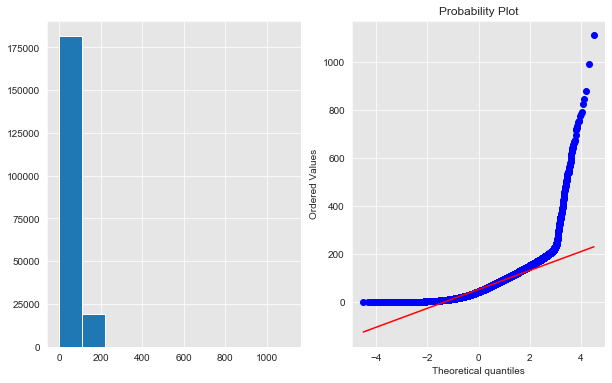

In [10]:
plot_data(finaldata,'TX_AMOUNT')

In [11]:
output_feature="TX_FRAUD"

input_features=['TX_AMOUNT','TX_DURING_WEEKEND', 'TX_DURING_NIGHT', 'CUSTOMER_ID_NB_TX_1DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW', 'CUSTOMER_ID_NB_TX_7DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW', 'CUSTOMER_ID_NB_TX_30DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW', 'TERMINAL_ID_NB_TX_1DAY_WINDOW',
       'TERMINAL_ID_RISK_1DAY_WINDOW', 'TERMINAL_ID_NB_TX_7DAY_WINDOW',
       'TERMINAL_ID_RISK_7DAY_WINDOW', 'TERMINAL_ID_NB_TX_30DAY_WINDOW',
       'TERMINAL_ID_RISK_30DAY_WINDOW']

In [12]:
y=finaldata[output_feature]
y

0         0
1         0
2         0
3         0
4         0
         ..
201290    0
201291    0
201292    0
201293    0
201294    0
Name: TX_FRAUD, Length: 201295, dtype: int64

In [13]:
X=finaldata[input_features]

In [175]:
X

,TX_AMOUNT,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
0,40.77,0,1,2.0,29.005000,24.0,29.191250,105.0,30.141810,1.0,0.0,10.0,0.0,32.0,0.0
1,9.62,0,1,4.0,25.492500,15.0,19.151333,61.0,18.253607,2.0,0.0,5.0,0.0,27.0,0.0
2,81.55,0,1,6.0,130.778333,11.0,183.875455,50.0,112.001800,0.0,0.0,12.0,0.0,37.0,0.0
3,23.10,0,1,8.0,19.600000,24.0,21.201667,93.0,19.987849,2.0,0.0,6.0,0.0,22.0,0.0
4,59.25,0,1,5.0,84.656000,27.0,80.427407,110.0,74.158455,1.0,0.0,10.0,0.0,38.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201290,16.72,0,0,1.0,16.720000,7.0,19.210000,21.0,22.987619,1.0,0.0,3.0,0.0,20.0,0.0
201291,38.16,0,0,7.0,40.305714,28.0,46.151429,97.0,45.018144,2.0,0.0,13.0,0.0,42.0,0.0
201292,69.85,0,0,3.0,92.500000,24.0,95.770417,101.0,89.886040,0.0,0.0,3.0,0.0,34.0,0.0
201293,14.99,0,0,3.0,22.343333,19.0,18.450000,77.0,15.848052,3.0,0.0,7.0,0.0,20.0,0.0


In [177]:
X['CUSTOMER_ID_NB_TX_1DAY_WINDOW'].max()

14.0

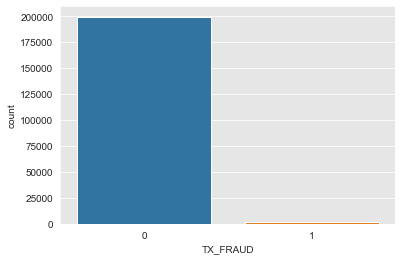

In [97]:
sns.countplot(x="TX_FRAUD", data=finaldata);

In [98]:
from imblearn.under_sampling import NearMiss

In [99]:
nm = NearMiss()

In [100]:
X_res,y_res=nm.fit_resample(X,y)

In [101]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 199503, 1: 1792})
Resampled dataset shape Counter({0: 1792, 1: 1792})


### Applying Logistic Regression on Undersampling

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve, roc_auc_score

In [103]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,train_size=0.7)


In [104]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

C:\Users\30ris\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [105]:
lrtr_pred=log_reg.predict(X_train)
print("Training Accuracy of Logistic Regression on Undersampling")
print(confusion_matrix(y_train,lrtr_pred))
print(accuracy_score(y_train,lrtr_pred))
print(classification_report(y_train,lrtr_pred))

Training Accuracy of Logistic Regression on Undersampling
[[1221   32]
 [  89 1166]]
0.9517543859649122
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1253
           1       0.97      0.93      0.95      1255

    accuracy                           0.95      2508
   macro avg       0.95      0.95      0.95      2508
weighted avg       0.95      0.95      0.95      2508



In [106]:
lrts_pred=log_reg.predict(X_test)
print("Testing Accuracy of Logistic Regression on Undersampling")
print(confusion_matrix(y_test,lrts_pred))
print(accuracy_score(y_test,lrts_pred))
print(classification_report(y_test,lrts_pred))

Testing Accuracy of Logistic Regression on Undersampling
[[535   4]
 [ 43 494]]
0.9563197026022305
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       539
           1       0.99      0.92      0.95       537

    accuracy                           0.96      1076
   macro avg       0.96      0.96      0.96      1076
weighted avg       0.96      0.96      0.96      1076



### Applying Decision Tree on Undersampling

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [109]:
dttr_pred=dtree.predict(X_train)
print("Training Accuracy of Decision Tree on Undersampling")
print(confusion_matrix(y_train,dttr_pred))
print(accuracy_score(y_train,dttr_pred))
print(classification_report(y_train,dttr_pred))

Training Accuracy of Decision Tree on Undersampling
[[1253    0]
 [   0 1255]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1253
           1       1.00      1.00      1.00      1255

    accuracy                           1.00      2508
   macro avg       1.00      1.00      1.00      2508
weighted avg       1.00      1.00      1.00      2508



In [110]:
dtts_pred=dtree.predict(X_test)
print("Testing Accuracy of Decision Tree on Undersampling")
print(confusion_matrix(y_test,dtts_pred))
print(accuracy_score(y_test,dtts_pred))
print(classification_report(y_test,dtts_pred))

Testing Accuracy of Decision Tree on Undersampling
[[515  24]
 [ 24 513]]
0.9553903345724907
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       539
           1       0.96      0.96      0.96       537

    accuracy                           0.96      1076
   macro avg       0.96      0.96      0.96      1076
weighted avg       0.96      0.96      0.96      1076



### Applying Random Forest on Undersampling

In [111]:
class_weight=dict({0:1,1:100})
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(class_weight=class_weight)
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100})

In [112]:
rftr_pred=rf.predict(X_train)
print("Training Accuracy of Random Forest on Undersampling")
print(confusion_matrix(y_train,rftr_pred))
print(accuracy_score(y_train,rftr_pred))
print(classification_report(y_train,rftr_pred))

Training Accuracy of Random Forest on Undersampling
[[1253    0]
 [   0 1255]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1253
           1       1.00      1.00      1.00      1255

    accuracy                           1.00      2508
   macro avg       1.00      1.00      1.00      2508
weighted avg       1.00      1.00      1.00      2508



In [113]:
rfts_pred=rf.predict(X_test)
print("Testing Accuracy of Random Forest on Undersampling")
print(confusion_matrix(y_test,rfts_pred))
print(accuracy_score(y_test,rfts_pred))
print(classification_report(y_test,rfts_pred))

Testing Accuracy of Random Forest on Undersampling
[[533   6]
 [ 21 516]]
0.974907063197026
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       539
           1       0.99      0.96      0.97       537

    accuracy                           0.97      1076
   macro avg       0.98      0.97      0.97      1076
weighted avg       0.98      0.97      0.97      1076



### Applying  XGBoost on Undersampling

In [114]:
import xgboost as xgb
from xgboost import XGBClassifier

In [115]:
xgb = XGBClassifier(objective='binary:logistic')
xgb.fit(X_train, y_train)

[10:35:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\30ris\anaconda3\envs\ftd\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [116]:
xgbtr_pred=rf.predict(X_train)
print("Training Accuracy of XGBOOST on Undersampling")
print(confusion_matrix(y_train,xgbtr_pred))
print(accuracy_score(y_train,xgbtr_pred))
print(classification_report(y_train,xgbtr_pred))

Training Accuracy of XGBOOST on Undersampling
[[1253    0]
 [   0 1255]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1253
           1       1.00      1.00      1.00      1255

    accuracy                           1.00      2508
   macro avg       1.00      1.00      1.00      2508
weighted avg       1.00      1.00      1.00      2508



In [117]:
xgbts_pred=rf.predict(X_test)
print("Testing Accuracy of XGBOOST on Undersampling")
print(confusion_matrix(y_test,xgbts_pred))
print(accuracy_score(y_test,xgbts_pred))
print(classification_report(y_test,xgbts_pred))

Testing Accuracy of XGBOOST on Undersampling
[[533   6]
 [ 21 516]]
0.974907063197026
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       539
           1       0.99      0.96      0.97       537

    accuracy                           0.97      1076
   macro avg       0.98      0.97      0.97      1076
weighted avg       0.98      0.97      0.97      1076



### ROC & AUC Curve on undersampling of all models of testing prediction

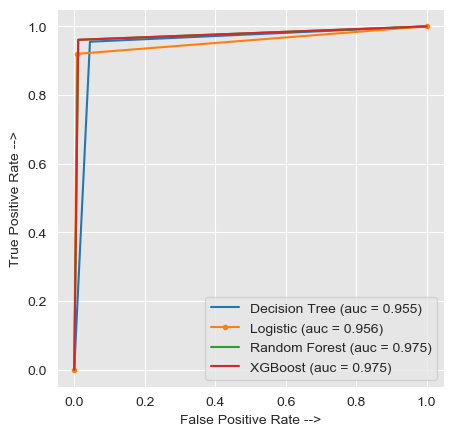

In [118]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, lrts_pred)
auc_logistic = auc(logistic_fpr, logistic_tpr)

dt_fpr, dt_tpr, threshold = roc_curve(y_test, dtts_pred)
auc_dt = auc(dt_fpr, dt_tpr)

rf_fpr, rf_tpr, threshold = roc_curve(y_test, rfts_pred)
auc_rf = auc(rf_fpr, rf_tpr)

xgb_fpr, xgb_tpr, threshold = roc_curve(y_test, xgbts_pred)
auc_xgb = auc(xgb_fpr, xgb_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(dt_fpr, dt_tpr, linestyle='-', label='Decision Tree (auc = %0.3f)' % auc_dt)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(rf_fpr, rf_tpr, linestyle='-', label='Random Forest (auc = %0.3f)' % auc_rf)
plt.plot(xgb_fpr, xgb_tpr, linestyle='-', label='XGBoost (auc = %0.3f)' % auc_xgb)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

### We have applied logistic regression,decision tree and random forest on undersampled dataset and we have found that decision tree and random forest has given very good accuracy

### UpSampling

In [119]:
from imblearn.combine import SMOTETomek

In [120]:
smk = SMOTETomek(random_state=42)
Xu_res,yu_res=smk.fit_resample(X,y)

In [121]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(yu_res)))

Original dataset shape Counter({0: 199503, 1: 1792})
Resampled dataset shape Counter({0: 199503, 1: 199503})


### Applying Logistic Regression on Upsampling

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve, roc_auc_score

In [123]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Xu_res,yu_res,train_size=0.7)


In [124]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

C:\Users\30ris\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [125]:
lrtr_pred=log_reg.predict(X_train)
print("Training Accuracy of Logistic Regression on Upsampling")
print(confusion_matrix(y_train,lrtr_pred))
print(accuracy_score(y_train,lrtr_pred))
print(classification_report(y_train,lrtr_pred))

Training Accuracy of Logistic Regression on Upsampling
[[134080   5665]
 [ 20357 119202]]
0.9068326984217913
              precision    recall  f1-score   support

           0       0.87      0.96      0.91    139745
           1       0.95      0.85      0.90    139559

    accuracy                           0.91    279304
   macro avg       0.91      0.91      0.91    279304
weighted avg       0.91      0.91      0.91    279304



In [126]:
lrts_pred=log_reg.predict(X_test)
print("Testing Accuracy of Logistic Regression on Upsampling")
print(confusion_matrix(y_test,lrts_pred))
print(accuracy_score(y_test,lrts_pred))
print(classification_report(y_test,lrts_pred))

Testing Accuracy of Logistic Regression on Upsampling
[[57319  2439]
 [ 8655 51289]]
0.9073198442799619
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     59758
           1       0.95      0.86      0.90     59944

    accuracy                           0.91    119702
   macro avg       0.91      0.91      0.91    119702
weighted avg       0.91      0.91      0.91    119702



### Applying Decision Tree on Upsampling

In [127]:
from sklearn.tree import DecisionTreeClassifier

In [128]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [129]:
dttr_pred=dtree.predict(X_train)
print("Training Accuracy of Decision Tree on Upsampling")
print(confusion_matrix(y_train,dttr_pred))
print(accuracy_score(y_train,dttr_pred))
print(classification_report(y_train,dttr_pred))

Training Accuracy of Decision Tree on Upsampling
[[139745      0]
 [     0 139559]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    139745
           1       1.00      1.00      1.00    139559

    accuracy                           1.00    279304
   macro avg       1.00      1.00      1.00    279304
weighted avg       1.00      1.00      1.00    279304



In [130]:
dtts_pred=dtree.predict(X_test)
print("Testing Accuracy of Decision Tree on Upsampling")
print(confusion_matrix(y_test,dtts_pred))
print(accuracy_score(y_test,dtts_pred))
print(classification_report(y_test,dtts_pred))

Testing Accuracy of Decision Tree on Upsampling
[[59345   413]
 [  259 59685]]
0.9943860587124693
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     59758
           1       0.99      1.00      0.99     59944

    accuracy                           0.99    119702
   macro avg       0.99      0.99      0.99    119702
weighted avg       0.99      0.99      0.99    119702



### Applying Random Forest on Upsampling

In [131]:
class_weight=dict({0:1,1:100})
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(class_weight=class_weight)
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100})

In [132]:
rftr_pred=rf.predict(X_train)
print("Training Accuracy of Random Forest on Upsampling")
print(confusion_matrix(y_train,rftr_pred))
print(accuracy_score(y_train,rftr_pred))
print(classification_report(y_train,rftr_pred))

Training Accuracy of Random Forest on Upsampling
[[139745      0]
 [     0 139559]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    139745
           1       1.00      1.00      1.00    139559

    accuracy                           1.00    279304
   macro avg       1.00      1.00      1.00    279304
weighted avg       1.00      1.00      1.00    279304



In [133]:
rfts_pred=rf.predict(X_test)
print("Testing Accuracy of Random Forest on Upsampling")
print(confusion_matrix(y_test,rfts_pred))
print(accuracy_score(y_test,rfts_pred))
print(classification_report(y_test,rfts_pred))

Testing Accuracy of Random Forest on Upsampling
[[59688    70]
 [  207 59737]]
0.997685920034753
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59758
           1       1.00      1.00      1.00     59944

    accuracy                           1.00    119702
   macro avg       1.00      1.00      1.00    119702
weighted avg       1.00      1.00      1.00    119702



### Applying  XGBoost on Upsampling

In [134]:
import xgboost as xgb
from xgboost import XGBClassifier

In [135]:
xgb = XGBClassifier(objective='binary:logistic')
xgb.fit(X_train, y_train)

C:\Users\30ris\anaconda3\envs\ftd\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:37:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [136]:
xgbtr_pred=rf.predict(X_train)
print("Training Accuracy of XGBOOST on Undersampling")
print(confusion_matrix(y_train,xgbtr_pred))
print(accuracy_score(y_train,xgbtr_pred))
print(classification_report(y_train,xgbtr_pred))

Training Accuracy of XGBOOST on Undersampling
[[139745      0]
 [     0 139559]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    139745
           1       1.00      1.00      1.00    139559

    accuracy                           1.00    279304
   macro avg       1.00      1.00      1.00    279304
weighted avg       1.00      1.00      1.00    279304



In [137]:
xgbts_pred=rf.predict(X_test)
print("Testing Accuracy of XGBOOST on Undersampling")
print(confusion_matrix(y_test,xgbts_pred))
print(accuracy_score(y_test,xgbts_pred))
print(classification_report(y_test,xgbts_pred))

Testing Accuracy of XGBOOST on Undersampling
[[59688    70]
 [  207 59737]]
0.997685920034753
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59758
           1       1.00      1.00      1.00     59944

    accuracy                           1.00    119702
   macro avg       1.00      1.00      1.00    119702
weighted avg       1.00      1.00      1.00    119702



### ROC & AUC Curve on upsampling of all models of testing prediction

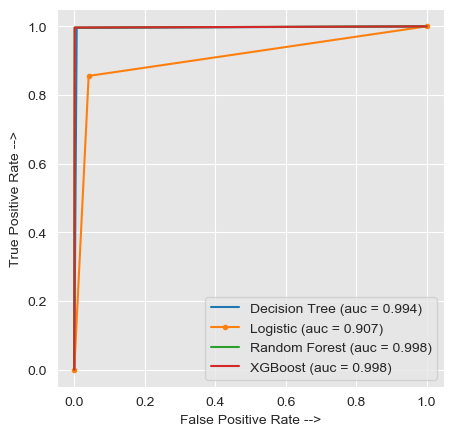

In [138]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, lrts_pred)
auc_logistic = auc(logistic_fpr, logistic_tpr)

dt_fpr, dt_tpr, threshold = roc_curve(y_test, dtts_pred)
auc_dt = auc(dt_fpr, dt_tpr)

rf_fpr, rf_tpr, threshold = roc_curve(y_test, rfts_pred)
auc_rf = auc(rf_fpr, rf_tpr)

xgb_fpr, xgb_tpr, threshold = roc_curve(y_test, xgbts_pred)
auc_xgb = auc(xgb_fpr, xgb_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(dt_fpr, dt_tpr, linestyle='-', label='Decision Tree (auc = %0.3f)' % auc_dt)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(rf_fpr, rf_tpr, linestyle='-', label='Random Forest (auc = %0.3f)' % auc_rf)
plt.plot(xgb_fpr, xgb_tpr, linestyle='-', label='XGBoost (auc = %0.3f)' % auc_xgb)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

### We have applied logistic regression,decision tree and random forest on upsampled dataset and this time we have found that decision tree and random forest has given more accuracy than that of undersampled data¶

### Now we are checking for feature importance of decision tree model that which feature has more predictive power

In [139]:
fi=pd.DataFrame({"Feature Name" : X.columns,"Importance":dtree.feature_importances_})

In [140]:
fi.sort_values(by=['Importance'],ascending=False)

,Feature Name,Importance
12,TERMINAL_ID_RISK_7DAY_WINDOW,0.441210
0,TX_AMOUNT,0.307525
9,TERMINAL_ID_NB_TX_1DAY_WINDOW,0.087343
8,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,0.059191
6,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,0.021614
14,TERMINAL_ID_RISK_30DAY_WINDOW,0.015712
4,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,0.015141
3,CUSTOMER_ID_NB_TX_1DAY_WINDOW,0.011933
11,TERMINAL_ID_NB_TX_7DAY_WINDOW,0.010328
7,CUSTOMER_ID_NB_TX_30DAY_WINDOW,0.008594


### we have found that balance feature has more predictive power than all of the other features which has highest value

### We decided to save decision tree moodel of up sampled data because it give the same accuracy as of random forest and xgboost and takes less computation power and it process fast.

In [168]:
dtree.predict([[97.72,1,0,4.0,53.365,27.0,52.455926,125.0,50.05456,1.0,0.0,6.0,0.0,19.0,0.0]])

C:\Users\30ris\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0], dtype=int64)

In [158]:
X_test.columns

Index(['TX_AMOUNT', 'TX_DURING_WEEKEND', 'TX_DURING_NIGHT',
       'CUSTOMER_ID_NB_TX_1DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW',
       'CUSTOMER_ID_NB_TX_7DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW',
       'CUSTOMER_ID_NB_TX_30DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW',
       'TERMINAL_ID_NB_TX_1DAY_WINDOW', 'TERMINAL_ID_RISK_1DAY_WINDOW',
       'TERMINAL_ID_NB_TX_7DAY_WINDOW', 'TERMINAL_ID_RISK_7DAY_WINDOW',
       'TERMINAL_ID_NB_TX_30DAY_WINDOW', 'TERMINAL_ID_RISK_30DAY_WINDOW'],
      dtype='object')

In [162]:
X_test.iloc[0]

TX_AMOUNT                               97.720000
TX_DURING_WEEKEND                        1.000000
TX_DURING_NIGHT                          0.000000
CUSTOMER_ID_NB_TX_1DAY_WINDOW            4.000000
CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW      53.365000
CUSTOMER_ID_NB_TX_7DAY_WINDOW           27.000000
CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW      52.455926
CUSTOMER_ID_NB_TX_30DAY_WINDOW         125.000000
CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW     50.054560
TERMINAL_ID_NB_TX_1DAY_WINDOW            1.000000
TERMINAL_ID_RISK_1DAY_WINDOW             0.000000
TERMINAL_ID_NB_TX_7DAY_WINDOW            6.000000
TERMINAL_ID_RISK_7DAY_WINDOW             0.000000
TERMINAL_ID_NB_TX_30DAY_WINDOW          19.000000
TERMINAL_ID_RISK_30DAY_WINDOW            0.000000
Name: 169263, dtype: float64

In [163]:
X_test.head(1)

,TX_AMOUNT,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
169263,97.72,1,0,4.0,53.365,27.0,52.455926,125.0,50.05456,1.0,0.0,6.0,0.0,19.0,0.0


In [167]:
y_test.iloc[0]

0

In [211]:
X['TERMINAL_ID_RISK_30DAY_WINDOW'].min()

0.0

In [210]:
X['TERMINAL_ID_RISK_30DAY_WINDOW'].max()

1.0

In [170]:
import pickle

In [171]:
filename1 = 'final_model.pkl'
pickle.dump(dtree, open(filename1, 'wb'))